In [51]:
# Import the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Load the dataset

df = pd.read_csv("titanic passenger list.csv")

In [65]:
# Explore the dataset (describe(),Info(),head(),tail())

print(df.describe())

            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881138     0.498854     0.385027   
std       0.837836     0.486055    14.413493     1.041658     0.865560   
min       1.000000     0.000000     0.170000     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  


In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [45]:
print(df.head(10))

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
5       1         1                              Anderson, Mr. Harry    male   
6       1         1                Andrews, Miss. Kornelia Theodosia  female   
7       1         0                           Andrews, Mr. Thomas Jr    male   
8       1         1    Appleton, Mrs. Edward Dale (Charlotte Lamson)  female   
9       1         0                          Artagaveytia, Mr. Ramon    male   

     age  sibsp  parch    ticket      fare    cabin embarked boat   body  \
0  29.00      0      0     24160  211.3375 

In [57]:
print(df.tail(10))

      pclass  survived                                     name     sex   age  \
1299       3         0                      Yasbeck, Mr. Antoni    male  27.0   
1300       3         1  Yasbeck, Mrs. Antoni (Selini Alexander)  female  15.0   
1301       3         0                     Youseff, Mr. Gerious    male  45.5   
1302       3         0                        Yousif, Mr. Wazli    male  28.0   
1303       3         0                    Yousseff, Mr. Gerious    male  28.0   
1304       3         0                     Zabour, Miss. Hileni  female  14.5   
1305       3         0                    Zabour, Miss. Thamine  female  28.0   
1306       3         0                Zakarian, Mr. Mapriededer    male  26.5   
1307       3         0                      Zakarian, Mr. Ortin    male  27.0   
1308       3         0                       Zimmerman, Mr. Leo    male  29.0   

      sibsp  parch  ticket     fare cabin embarked boat   body homedest  
1299      1      0    2659  14.454

In [55]:
# Clean column names

df.columns = df.columns.str.lower().str.replace(".", "").str.replace(" ", "_")

In [71]:
# Fill missing age and fare with median values

df['age'] = df['age'].fillna(df['age'].median())
df['fare'] = df['fare'].fillna(df['fare'].median())

In [73]:

# Fill missing embarked with most frequent value
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [75]:
# Drop columns with excessive missing data

df.drop(columns=['cabin', 'boat', 'body', 'homedest'], inplace=True, errors='ignore')

In [77]:
# Visualizations

sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

([<matplotlib.axis.XTick at 0x2aad9e50590>,
 [Text(0, 0, 'Did Not Survive'), Text(1, 0, 'Survived')])

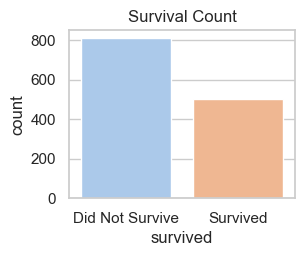

In [81]:
# 1. Survival Count

plt.subplot(2, 2, 1)
sns.countplot(data=df, x='survived', hue='survived', palette='pastel', legend=False)
plt.title("Survival Count")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])

In [97]:
print("\n1.Survival Counts:")
print(df['survived'].value_counts().rename(index={0: 'Did Not Survive', 1: 'Survived'}))


1.Survival Counts:
survived
Did Not Survive    809
Survived           500
Name: count, dtype: int64


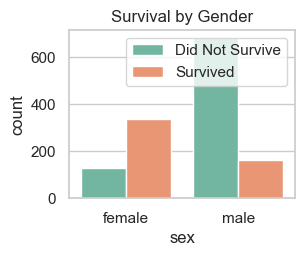

In [83]:
# 2. Survival by Gender

plt.subplot(2, 2, 2)
sns.countplot(data=df, x='sex', hue='survived', palette='Set2')
plt.title("Survival by Gender")
plt.legend(['Did Not Survive', 'Survived'])

In [99]:
print("\n2.Survival by Gender:")
print(pd.crosstab(df['sex'], df['survived'], rownames=['Gender'], colnames=['Survived'])
      .rename(columns={0: 'Did Not Survive', 1: 'Survived'}))


2.Survival by Gender:
Survived  Did Not Survive  Survived
Gender                             
female                127       339
male                  682       161


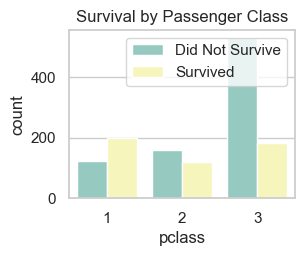

In [85]:
# 3. Survival by Passenger Class

plt.subplot(2, 2, 3)
sns.countplot(data=df, x='pclass', hue='survived', palette='Set3')
plt.title("Survival by Passenger Class")
plt.legend(['Did Not Survive', 'Survived'])

In [101]:
print("\n3.Survival by Passenger Class:")
print(pd.crosstab(df['pclass'], df['survived'], rownames=['Passenger Class'], colnames=['Survived'])
      .rename(columns={0: 'Did Not Survive', 1: 'Survived'}))


3.Survival by Passenger Class:
Survived         Did Not Survive  Survived
Passenger Class                           
1                            123       200
2                            158       119
3                            528       181


Text(0.5, 1.0, 'Age Distribution by Survival')

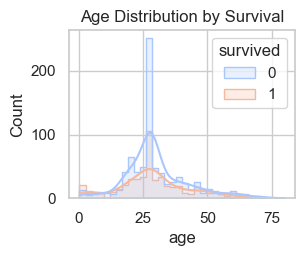

In [87]:
# 4. Age Distribution by Survival

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='age', hue='survived', kde=True, element="step", palette='coolwarm')
plt.title("Age Distribution by Survival")

In [103]:
print("\n4.Age Statistics by Survival:")
print(df.groupby('survived')['age'].describe().rename(index={0: 'Did Not Survive', 1: 'Survived'}))


4.Age Statistics by Survival:
                 count       mean        std   min    25%   50%   75%   max
survived                                                                   
Did Not Survive  809.0  29.947565  12.223851  0.33  23.00  28.0  35.0  74.0
Survived         500.0  28.784180  13.920007  0.17  21.75  28.0  36.0  80.0
